In [11]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.model_selection import KFold
from tqdm import tqdm
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from joblib import dump

In [3]:
df_train = pd.read_csv("data/sign_mnist_train.csv")
df_test = pd.read_csv("data/sign_mnist_test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

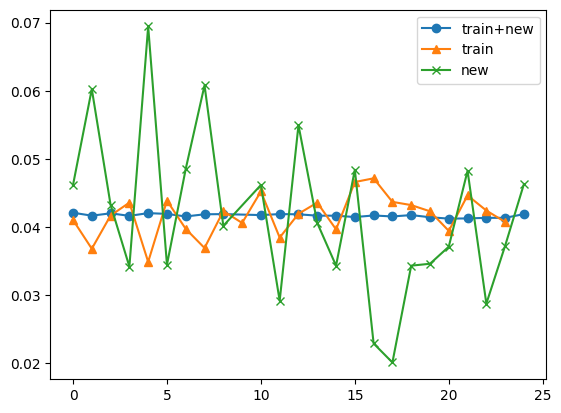

In [47]:
global_proportions = df['label'].value_counts(normalize=True).sort_index()
plt.plot(global_proportions, marker='o', label="train+new")

train_proportions = df_train['label'].value_counts(normalize=True).sort_index()
plt.plot(train_proportions, marker='^', label="train")

test_proportions = df_test['label'].value_counts(normalize=True).sort_index()
plt.plot(test_proportions, marker='x', label="new")

plt.legend()
plt.show()

In [5]:
X = np.array(df_train.iloc[:,1:])
Y = df_train['label']

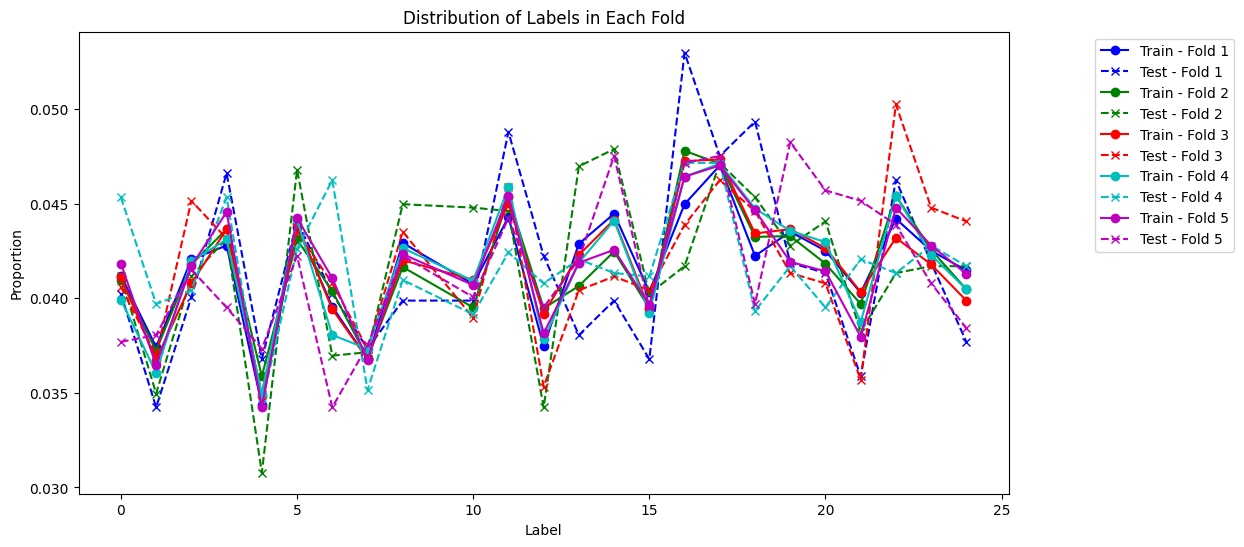

In [6]:
# Define the number of folds
n_splits = 5  # You can adjust the number of folds as needed

kfold = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Plot for each fold
plt.figure(figsize=(12, 6))
plt.title('Distribution of Labels in Each Fold')

# Define colors for each fold
colors = ['b', 'g', 'r', 'c', 'm']

for i, (train_index, test_index) in enumerate(kfold.split(X, Y), 1):
    train_fold = Y.iloc[train_index]
    test_fold = Y.iloc[test_index]

    # Plot the training set distribution
    train_proportions = train_fold.value_counts(normalize=True).sort_index()
    plt.plot(train_proportions, label=f'Train - Fold {i}', color=colors[i - 1], marker='o')

    # Plot the test set distribution
    test_proportions = test_fold.value_counts(normalize=True).sort_index()
    plt.plot(test_proportions, label=f'Test - Fold {i}', linestyle='dashed', color=colors[i - 1], marker='x')

plt.xlabel('Label')
plt.ylabel('Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

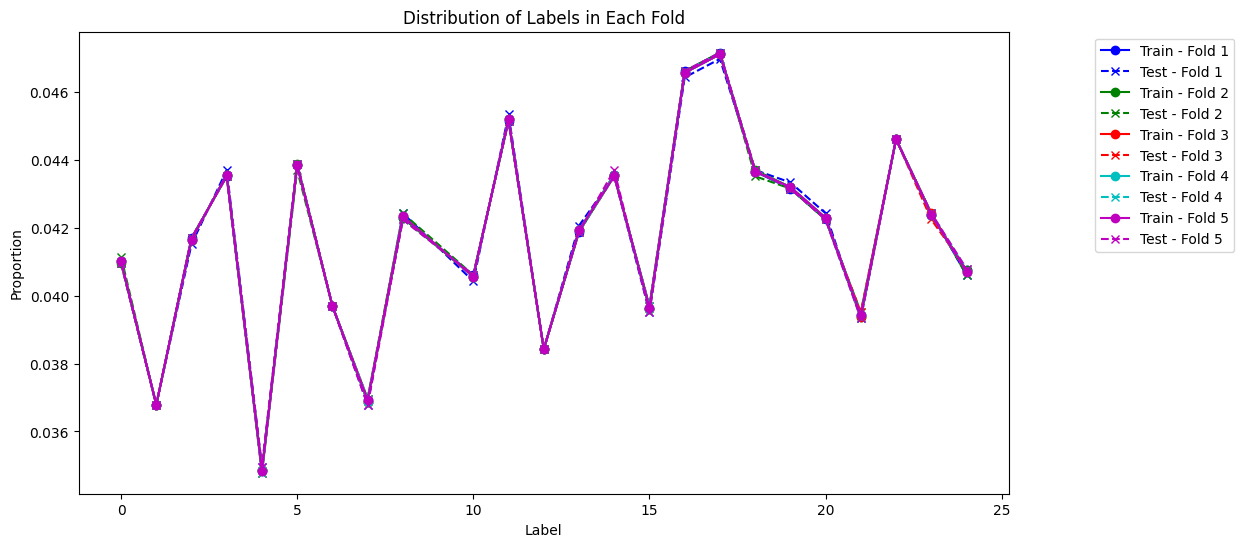

In [7]:
# Define the number of folds
n_splits = 5  # You can adjust the number of folds as needed

# Create StratifiedKFold object
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Plot for each fold
plt.figure(figsize=(12, 6))
plt.title('Distribution of Labels in Each Fold')

# Define colors for each fold
colors = ['b', 'g', 'r', 'c', 'm']

for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, Y), 1):
    train_fold = Y.iloc[train_index]
    test_fold = Y.iloc[test_index]

    # Plot the training set distribution
    train_proportions = train_fold.value_counts(normalize=True).sort_index()
    plt.plot(train_proportions, label=f'Train - Fold {i}', color=colors[i - 1], marker='o')

    # Plot the test set distribution
    test_proportions = test_fold.value_counts(normalize=True).sort_index()
    plt.plot(test_proportions, label=f'Test - Fold {i}', linestyle='dashed', color=colors[i - 1], marker='x')

plt.xlabel('Label')
plt.ylabel('Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.show()

In [8]:
n_splits = 5  

stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

classifier = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

grid_search = GridSearchCV(classifier, param_grid, cv=stratified_kfold)
grid_search.fit(X, Y)

best_classifier = grid_search.best_estimator_


In [35]:
print(best_classifier)

RandomForestClassifier(n_estimators=200, random_state=42)


In [10]:
all_y_true = []
all_y_pred = []

for i, (train_index, test_index) in tqdm(enumerate(stratified_kfold.split(X, Y), 1)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y.iloc[train_index], Y.iloc[test_index]

    # Train the classifier
    best_classifier.fit(X_train, y_train)

    # Evaluate on the test set
    y_pred = best_classifier.predict(X_test)

    # Save true and predicted labels for later analysis
    all_y_true.extend(y_test)
    all_y_pred.extend(y_pred)

    # Print evaluation metrics for each fold
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    print(f"Fold {i} - Accuracy: {accuracy}")
    #print(f"Fold {i} - Classification Report:\n{report}")
    #print(f"Fold {i} - Confusion Matrix:\n{conf_matrix}")

# Evaluate overall performance (across all folds)
overall_accuracy = accuracy_score(all_y_true, all_y_pred)
overall_report = classification_report(all_y_true, all_y_pred)
overall_conf_matrix = confusion_matrix(all_y_true, all_y_pred)

print("Overall Accuracy: ", overall_accuracy)
#print("Overall Classification Report:\n", overall_report)
#print("Overall Confusion Matrix:\n", overall_conf_matrix)

#dump(best_classifier, 'best_model.joblib')

1it [01:36, 96.79s/it]

Fold 1 - Accuracy: 0.998178838098707


2it [03:12, 96.16s/it]

Fold 2 - Accuracy: 0.9978146057184484


3it [04:45, 94.88s/it]

Fold 3 - Accuracy: 0.9979967219085777


4it [06:23, 95.89s/it]

Fold 4 - Accuracy: 0.9979967219085777


5it [07:58, 95.73s/it]

Fold 5 - Accuracy: 0.998178838098707
Overall Accuracy:  0.9980331451466036
Overall Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1126
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00      1144
           3       1.00      1.00      1.00      1196
           4       1.00      1.00      1.00       957
           5       1.00      1.00      1.00      1204
           6       1.00      1.00      1.00      1090
           7       1.00      1.00      1.00      1013
           8       1.00      1.00      1.00      1162
          10       0.99      1.00      1.00      1114
          11       1.00      1.00      1.00      1241
          12       1.00      0.99      1.00      1055
          13       1.00      1.00      1.00      1151
          14       1.00      1.00      1.00      1196
          15       0.99      1.00      1.00      1088
          16       1.00     

['best_model.joblib']

In [29]:
model_path = "models/xgb.joblib"

In [28]:
import joblib

In [123]:
df_train = pd.read_csv("data/sign_mnist_train.csv") 
df_test = pd.read_csv("data/sign_mnist_test.csv")
df = pd.concat([df_train, df_test], ignore_index=True)

In [120]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34622,1,135,119,108,102,105,99,61,103,121,...,108,112,116,114,118,180,184,176,167,163
34623,12,157,159,161,164,166,166,171,174,175,...,213,213,213,214,213,211,210,210,209,208
34624,2,190,191,190,191,190,190,192,192,191,...,216,215,213,214,214,213,210,211,209,208
34625,4,201,205,208,209,214,216,218,223,226,...,112,169,255,255,237,113,91,67,70,63


In [125]:
df = pd.read_csv("data/sign_mnist_train.csv") 

In [122]:
df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [126]:
X = np.array(df_train.iloc[:,1:])
Y = df_train['label']
Y[Y > 9] -= 1

In [127]:
from sklearn.model_selection import StratifiedShuffleSplit

stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, valid_index in stratified_split.split(X, Y):
    X_train, X_valid = X[train_index], X[valid_index]
    Y_train, Y_valid = Y[train_index], Y[valid_index]

In [128]:
Y_train = Y_train.reset_index()['label']

In [130]:
Y_valid = Y_valid.reset_index()['label']

In [129]:
print(X_valid.shape, Y_valid.shape)

(5491, 784) (5491,)


In [115]:
# Convertir les tableaux NumPy en DataFrames
df_X_train = pd.DataFrame(X_train, columns=None)  # Laissez pandas attribuer les noms de colonnes
df_train = pd.concat([Y_train, df_X_train], axis=1)
#df_train['label'] = pd.Series(Y_train)  # Ajoutez la colonne de la cible si elle existe
df_X_valid = pd.DataFrame(X_valid, columns=None)
df_valid = pd.concat([Y_valid, df_X_valid], axis=1)
#df_valid['label'] = pd.Series(Y_valid)

# Enregistrer les DataFrames en fichiers CSV
df_train.to_csv('data/split_train_data.csv', index=False)
df_valid.to_csv('data/split_valid_data.csv', index=False)

In [116]:
data = pd.read_csv("data/split_valid_data.csv") 
data

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,18,198,201,202,204,204,205,205,205,206,...,185,185,163,204,167,192,137,175,188,187
1,12,177,178,180,182,183,183,185,185,186,...,210,209,208,208,207,207,206,205,204,203
2,12,147,151,154,157,161,166,169,173,176,...,140,165,118,83,150,196,67,63,160,153
3,22,162,165,167,170,173,177,179,179,180,...,67,63,90,92,90,90,89,89,88,85
4,20,177,179,180,183,185,186,187,188,188,...,58,95,118,108,92,89,87,86,86,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5486,3,163,165,166,167,167,167,168,168,169,...,84,98,107,106,110,117,126,138,153,163
5487,23,178,181,185,187,188,191,194,196,199,...,153,229,219,222,222,222,222,223,224,223
5488,18,204,205,206,206,206,206,207,207,207,...,186,174,133,160,181,184,192,208,199,180
5489,15,48,52,57,64,86,111,126,132,139,...,0,0,117,148,0,0,0,0,0,0


In [131]:
model = RandomForestClassifier(n_estimators=200, random_state=42)

In [132]:
model.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [133]:
y_pred = model.predict(X_valid)

In [134]:
accuracy = accuracy_score(Y_valid, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978146057184484


<Axes: >

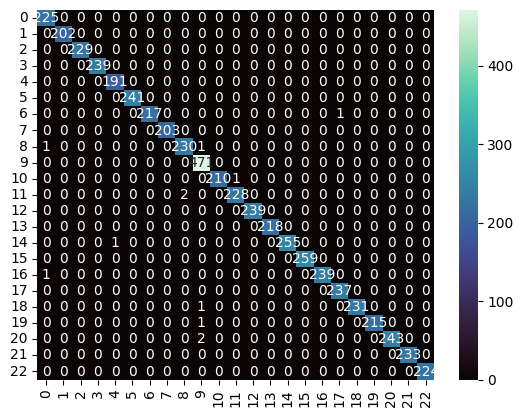

In [135]:
confusion_mat = confusion_matrix(Y_valid, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="mako")

In [40]:
model_path = "models/random_forest_200_valid.joblib"

In [41]:
joblib.dump(model, model_path)

['models/random_forest_200_valid.joblib']

In [18]:
df_testA = pd.read_csv("data/testA.csv")
df_testB = pd.read_csv("data/testB.csv")
df_test = pd.read_csv("data/test.csv")

In [16]:
y_predA = best_classifier.predict(df_testA)
y_predB = best_classifier.predict(df_testB)

c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
c:\Users\Prevot\anaconda3\envs\ift6758\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [31]:
y_predA

array([ 6,  2,  1, ..., 23,  4, 19], dtype=int64)

In [19]:
from submit_result import *

In [20]:
pred_final = create_real_pred(y_predA, y_predB)

In [22]:
submit = pd.concat([df_test['id'], pred_final], axis = 1)
submit

,id,label
0,0,M
1,1,Y
2,2,G
3,3,S
4,4,\
...,...,...
2995,2995,m
2996,2996,^
2997,2997,k
2998,2998,S


In [23]:
submit.to_csv("results/submit_6_rdm_forest_sklearn.csv", index=False)